In [248]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [255]:
# Generating data for the regression
dataset_size = 1000
np.random.seed(10)
x = np.linspace(0, 2 * np.pi, dataset_size)
y = np.sin(x) + 0.2 * np.random.randn(dataset_size)

# Train, valid, and test splits
indices = np.random.choice(np.arange(dataset_size), size=dataset_size, replace=False)
train_indices = indices[:int(dataset_size * 0.8)]
valid_indices = indices[int(dataset_size * 0.8):int(dataset_size * 0.9)]
test_indices = np.sort(indices[int(dataset_size * 0.9):])

x_train, y_train = x[train_indices], y[train_indices]
x_valid, y_valid = x[valid_indices], y[valid_indices]
x_test, y_test = x[test_indices], y[test_indices]


# Define the feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(1,), kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(1)
])

# Define a loss function and optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.03, momentum=0.9)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Early Stopping Callback
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    verbose=1,
    restore_best_weights=True
)

# Training loop with early stopping
epochs = 1000

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    verbose=0,
    callbacks=[early_stopping_callback]
)
early_stopped_epoch = len(history.history['loss'])

Restoring model weights from the end of the best epoch: 650.
Epoch 750: early stopping


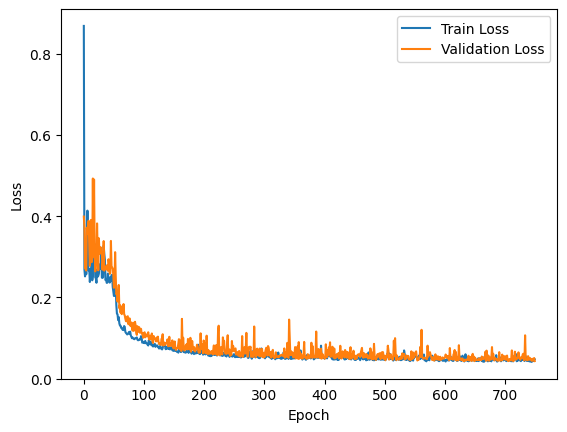

In [256]:
# Plot the training and validation history
plt.plot(range(early_stopped_epoch), history.history['loss'], label='Train Loss')
plt.plot(range(early_stopped_epoch), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step


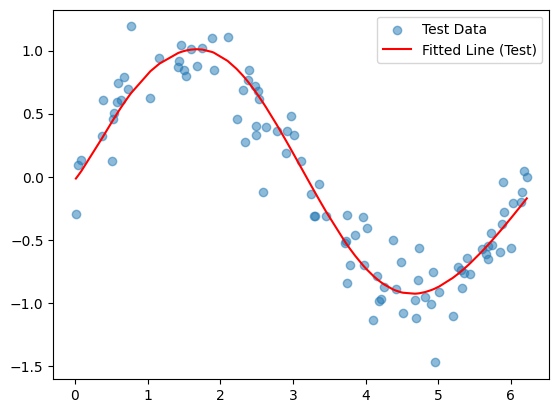

In [257]:
# Plot the best model's predictions on the test split
predicted_test = model.predict(x_test)
plt.scatter(x_test, y_test, label='Test Data', alpha=0.5)
plt.plot(x_test, predicted_test, 'r', label='Fitted Line (Test)')
plt.legend()
plt.show()
